In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [ ]:
import pandas as pd
import os
from PIL import Image
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

import numpy as np
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F

!pip install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 15.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 19.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolve

# Load data split train, val

In [ ]:
from datasets import load_dataset

data_dir = "/content/drive/MyDrive/Colab Notebooks/imageprocessProjectInput"  # Â∞á MyDrive ÊõøÊèõÁÇ∫ÊÇ®ÁöÑË≥áÊñôÂ§æÂêçÁ®±

In [ ]:
# ËºâÂÖ•Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ
train_ds = load_dataset("imagefolder", data_dir=os.path.join(data_dir, "training_set"), split="train")
test_ds = load_dataset("imagefolder", data_dir=os.path.join(data_dir, "testing_set"), split="train")

# label2idx and idx2label
# Âª∫Á´ãÊ®ôÁ±§ÂíåÁ¥¢Âºï‰πãÈñìÁöÑÊò†Â∞Ñ
id2label = {id:label for id, label in enumerate(train_ds.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}

# split train, val
# Â∞áË®ìÁ∑¥ÈõÜÂàÜÂâ≤ÊàêË®ìÁ∑¥ÈõÜÂíåÈ©óË≠âÈõÜ
splits = train_ds.train_test_split(test_size=0.1, shuffle=True, seed=42)
train_ds, val_ds = splits["train"], splits["test"]

# È°ØÁ§∫Ë≥áÊñôÈõÜË≥áË®ä
print("Features", train_ds.features)
print("Train", train_ds)
print("Validation", val_ds)
print("Test", test_ds)
print("Num labels", len(label2id))
print("Label2Idx", label2id)

Resolving data files:   0%|          | 0/4001 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/1001 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Features {'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['Heart', 'Oblong', 'Oval', 'Round', 'Square'], id=None)}
Train Dataset({
    features: ['image', 'label'],
    num_rows: 3600
})
Validation Dataset({
    features: ['image', 'label'],
    num_rows: 400
})
Test Dataset({
    features: ['image', 'label'],
    num_rows: 1000
})
Num labels 5
Label2Idx {'Heart': 0, 'Oblong': 1, 'Oval': 2, 'Round': 3, 'Square': 4}


# Visualize some images and labels

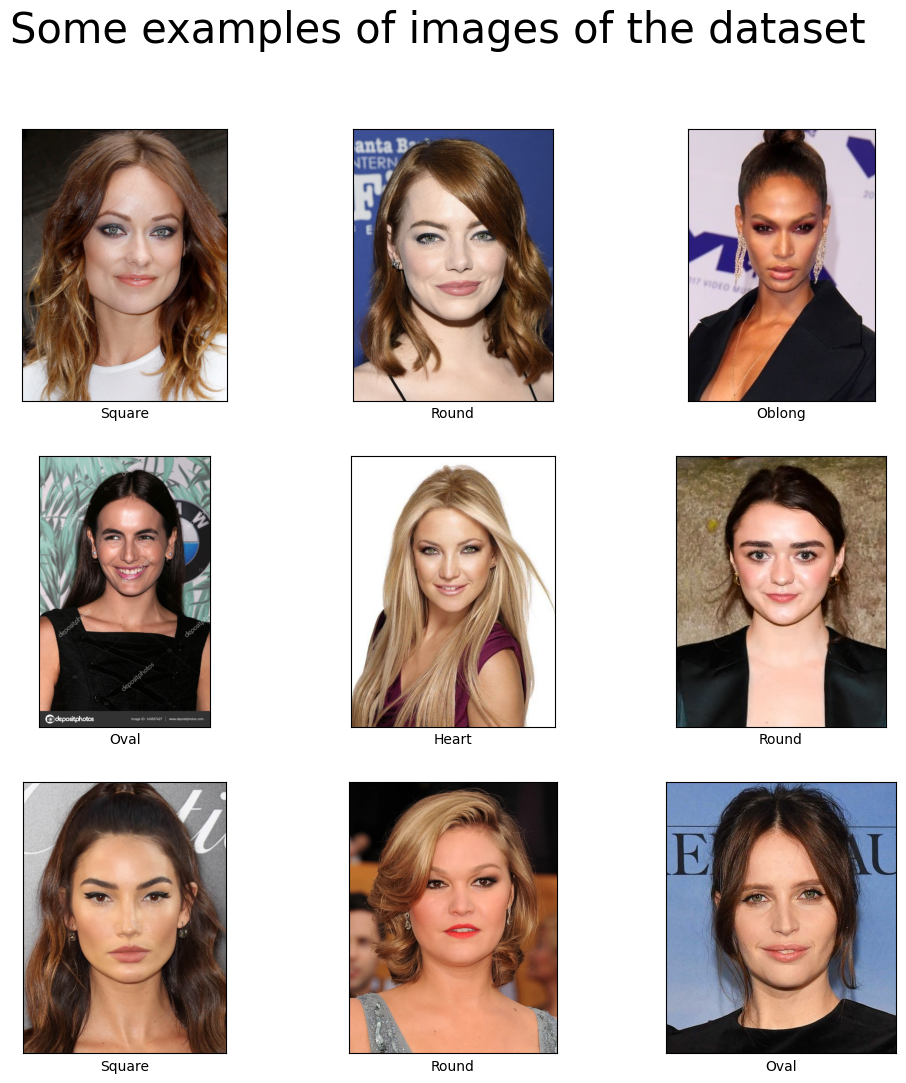

In [ ]:
import cv2
import matplotlib.pyplot as plt
from random import randint

# ÂÆöÁæ©È°ØÁ§∫ÁØÑ‰æãÂúñÁâáÁöÑÂáΩÂºè
list_idx = [randint(0, len(train_ds)) for i in range(9)]
def display_examples():
    fig = plt.figure(figsize=(12,12))
    fig.suptitle("Some examples of images of the dataset", fontsize=30)
    for i, idx in enumerate(list_idx):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_ds[idx]["image"], cmap=plt.cm.binary)
        plt.xlabel(id2label[train_ds[idx]["label"]])
    plt.show()

# È°ØÁ§∫ÁØÑ‰æãÂúñÁâá
display_examples()

# Transforms

In [ ]:
from transformers import AutoFeatureExtractor
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor
)

# ËºâÂÖ•ÁâπÂæµÊèêÂèñÂô®
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

# ËºâÂÖ•ÁâπÂæµÊèêÂèñÂô®
normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

# ÂÆöÁæ©Ë®ìÁ∑¥ÈõÜÂíåÈ©óË≠âÈõÜÁöÑË≥áÊñôÂ¢ûÂº∑
_train_transforms = Compose(
    [
        RandomResizedCrop((feature_extractor.size['height'], feature_extractor.size['width'])),  # ÂæûÂ≠óÂÖ∏‰∏≠Ë®™ÂïèÈ´òÂ∫¶ÂíåÂØ¨Â∫¶
        RandomHorizontalFlip(),
        ToTensor(),
        normalize,
    ]
)

_val_transforms = Compose(
        [
            Resize((feature_extractor.size['height'], feature_extractor.size['width'])), # Access height and width from the dictionary
            CenterCrop((feature_extractor.size['height'], feature_extractor.size['width'])), # Access height and width from the dictionary
            ToTensor(),
            normalize,
        ]
    )

# ÂÆöÁæ©ÊáâÁî®Ë≥áÊñôÂ¢ûÂº∑ÁöÑÂáΩÂºè
def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

# Set the transforms
# Â∞çË≥áÊñôÈõÜÊáâÁî®Ë≥áÊñôÂ¢ûÂº∑
train_ds.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
test_ds.set_transform(val_transforms)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
# È°ØÁ§∫ÁâπÂæµÊèêÂèñÂô®ÁöÑÂùáÂÄºÂíåÊ®ôÊ∫ñÂ∑Æ
feature_extractor.image_mean, feature_extractor.image_std

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [ ]:
# È°ØÁ§∫ÁâπÂæµÊèêÂèñÂô®Ë≥áË®ä
feature_extractor

ViTFeatureExtractor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

# Dataloader

In [ ]:
from torch.utils.data import DataLoader
import torch

# ÂÆöÁæ©Ë≥áÊñôÊï¥ÁêÜÂáΩÂºè
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

# Âª∫Á´ãË®ìÁ∑¥ÈõÜË≥áÊñôËºâÂÖ•Âô®
train_dataloader = DataLoader(train_ds, collate_fn=collate_fn, batch_size=4)

# Deffine the model

In [ ]:
from transformers import SwinForImageClassification, SwinConfig

# ÂÆöÁæ©Ê®°ÂûãÈÖçÁΩÆ
config = SwinConfig.from_pretrained(
        "microsoft/swin-tiny-patch4-window7-224",
        num_labels=len(label2id),
        label2id=label2id,
        id2label=id2label,
        finetuning_task="image-classification"
    )

# ËºâÂÖ•È†êË®ìÁ∑¥Ê®°Âûã
model = SwinForImageClassification.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224",
    config=config,
    ignore_mismatched_sizes=True
)

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer

# ÂÆöÁæ©Ë®ìÁ∑¥ÂèÉÊï∏
metric_name = "accuracy"
args = TrainingArguments(
    f"faceshape",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=21,
    weight_decay=0.01,
    load_best_model_at_end=True,
    save_total_limit=1,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


# Load metric

In [ ]:
!pip install evaluate

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
from evaluate import load
import numpy as np

# ËºâÂÖ•Ë©ï‰º∞ÊåáÊ®ô
metric = load(metric_name)

# ÂÆöÁæ©Ë®àÁÆóË©ï‰º∞ÊåáÊ®ôÁöÑÂáΩÂºè
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
# Âª∫Á´ãË®ìÁ∑¥Âô®
trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=feature_extractor,
)

<ipython-input-15-f6eb762f37f6>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Á¶ÅÁî® Weights & Biases
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"

# ËôïÁêÜÂèØËÉΩÂá∫ÁèæÁöÑÂúñÁâáËºâÂÖ•ÈåØË™§
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# ÈñãÂßãË®ìÁ∑¥Ê®°Âûã
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


TrainOutput(global_step=2260, training_loss=0.8203253416888482, metrics={'train_runtime': 3817.2663, 'train_samples_per_second': 18.862, 'train_steps_per_second': 0.592, 'total_flos': 1.789781226799104e+18, 'train_loss': 0.8203253416888482, 'epoch': 20.0})

# Validation

In [ ]:
# Ë©ï‰º∞Ê®°ÂûãÂú®È©óË≠âÈõÜ‰∏äÁöÑË°®Áèæ
trainer.evaluate()

{'eval_loss': 0.7477984428405762,
 'eval_accuracy': 0.735,
 'eval_runtime': 7.6507,
 'eval_samples_per_second': 52.283,
 'eval_steps_per_second': 1.699,
 'epoch': 20.0}

# Evaluation on test set

In [ ]:
# Ë©ï‰º∞Ê®°ÂûãÂú®Ê∏¨Ë©¶ÈõÜ‰∏äÁöÑË°®Áèæ
outputs = trainer.predict(test_ds)
print(outputs.metrics)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ÂèñÂæóÁúüÂØ¶Ê®ôÁ±§ÂíåÈ†êÊ∏¨Ê®ôÁ±§
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
labels = train_ds.features['label'].names

{'test_loss': 0.7661802768707275, 'test_accuracy': 0.717, 'test_runtime': 480.7879, 'test_samples_per_second': 2.08, 'test_steps_per_second': 0.067}


# Classification report

In [ ]:
# Classification report
from sklearn.metrics import classification_report

# È°ØÁ§∫ÂàÜÈ°ûÂ†±Âëä
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

       Heart       0.69      0.71      0.70       200
      Oblong       0.77      0.73      0.75       200
        Oval       0.58      0.61      0.60       200
       Round       0.72      0.78      0.75       200
      Square       0.85      0.74      0.79       200

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



# Confusion matrix

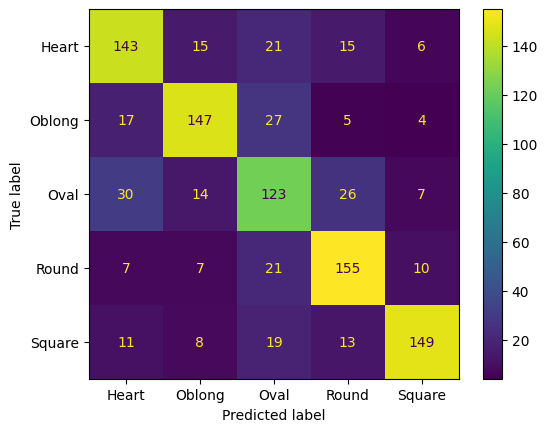

In [ ]:
# Confusion matrix
# È°ØÁ§∫Ê∑∑Ê∑ÜÁü©Èô£
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

# Visualize some predicted results

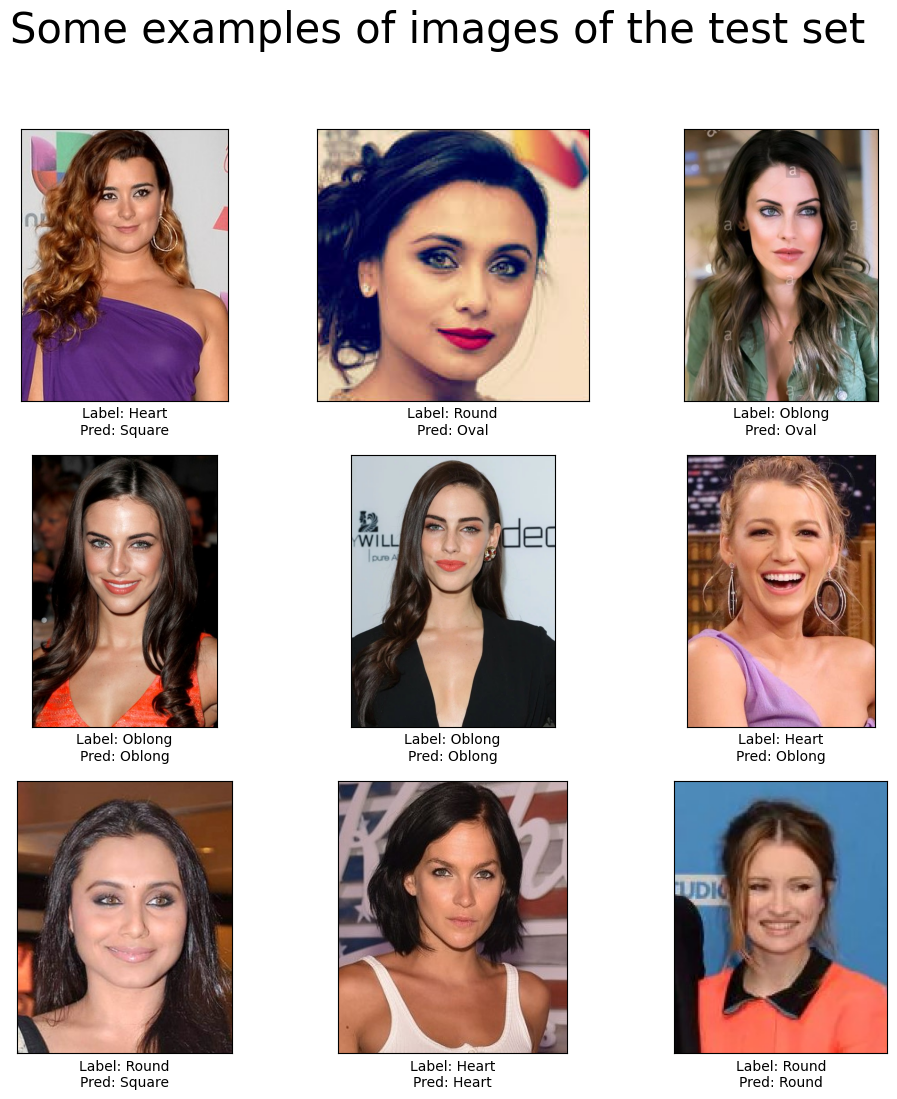

In [ ]:
import cv2
import matplotlib.pyplot as plt
from random import randint

# ÂÆöÁæ©È°ØÁ§∫È†êÊ∏¨ÁµêÊûúÁöÑÂáΩÂºè
list_idx = [randint(0, len(test_ds)) for i in range(9)]

def display_examples():
    fig = plt.figure(figsize=(12,12))
    fig.suptitle("Some examples of images of the test set", fontsize=30)
    for i,idx in enumerate(list_idx):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_ds[idx]["image"], cmap=plt.cm.binary)
        plt.xlabel("Label: "+id2label[y_true[idx]]+"\nPred: "+id2label[y_pred[idx]])
    plt.show()

# È°ØÁ§∫È†êÊ∏¨ÁµêÊûú
display_examples()